In [1]:
import os
instance_files = os.listdir("data/method_outputs/")
instance_files

['bur26a', 'els19', 'lipa40a', 'nug14', 'rou20', 'sko100a', 'ste36c', 'tho150']

In [2]:
size = 26

In [3]:
data = []
times = []
for i in instance_files:
    method_files = os.listdir("data/method_outputs/" + i)
    for m in method_files:
        txt_files = os.listdir("data/method_outputs/" + i + "/" + m)
        for file in txt_files:
            if (file !="Time.txt"):
                path = "data/method_outputs/" + i +"/"+ m +"/"+ file
                with open(path, 'r') as f:
                    lines = f.readlines()
                    size = int(lines[0].strip()) if lines[0].strip().isdigit() else None
                    starting = int(lines[1].strip()) if lines[1].strip().isdigit() else None
                    initialSolution = []
                    for line in lines[2:size+2]: 
                        initialSolution.append(int(line.strip()))
                    steps = int(lines[size+2].strip()) if lines[size+2].strip().isdigit() else None
                    evals = int(lines[size+3].strip()) if lines[size+3].strip().isdigit() else None
                    value = int(lines[size+4].strip()) if lines[size+4].strip().isdigit() else None
                    solution = []
                    for line in lines[size+6:]:  
                        solution.append(int(line.strip()))

                    result = {
                        'method': m,
                        'instance': i,
                        'run': file.split('.')[0],
                        'size': size,
                        'steps': steps,
                        'evals': evals,
                        'f_val': value,
                        'start_val': starting,
                        'initial': initialSolution,
                        'solution': solution
                    }
                    data.append(result)
            else:
                path = "data/method_outputs/" + i +"/"+ m +"/"+ file
                with open(path, 'r') as f:
                    lines = f.readlines()
                    fullTime = []
                    for line in lines[:10]:  
                        fullTime.append(int(line.strip()))
                    bestCost = int(lines[10].strip())
                    bestSol = []
                    for line in lines[11:]:  
                        bestSol.append(int(line.strip()))

                    time = {
                        'method':m,
                        'instance': i,
                        'bestFit': bestCost,
                        'bestSol': bestSol,
                        'time': fullTime,
                    }
                    times.append(time)

        

    

In [4]:
print(data[0:5])

[{'method': 'Greedy', 'instance': 'bur26a', 'run': '1', 'size': 26, 'steps': 52, 'evals': 9636, 'f_val': 5736637, 'start_val': 5967720, 'initial': [23, 24, 3, 11, 9, 21, 13, 2, 10, 5, 16, 14, 20, 19, 1, 0, 12, 22, 25, 6, 4, 15, 8, 7, 17, 18], 'solution': [23, 24, 3, 11, 9, 21, 13, 2, 10, 5, 16, 4, 20, 19, 1, 0, 12, 22, 25, 6, 14, 15, 8, 7, 17, 18]}, {'method': 'Greedy', 'instance': 'bur26a', 'run': '10', 'size': 26, 'steps': 22, 'evals': 8967, 'f_val': 5764439, 'start_val': 6305452, 'initial': [13, 6, 24, 14, 0, 15, 11, 23, 3, 9, 5, 2, 7, 22, 12, 18, 25, 10, 16, 20, 17, 4, 19, 8, 21, 1], 'solution': [3, 24, 7, 18, 17, 1, 10, 0, 8, 2, 14, 12, 19, 9, 25, 4, 21, 23, 6, 16, 13, 5, 15, 11, 22, 20]}, {'method': 'Greedy', 'instance': 'bur26a', 'run': '100', 'size': 26, 'steps': 32, 'evals': 8717, 'f_val': 5691068, 'start_val': 5990755, 'initial': [12, 25, 13, 22, 9, 24, 4, 16, 23, 15, 1, 5, 20, 2, 21, 3, 17, 14, 10, 11, 8, 6, 7, 19, 0, 18], 'solution': [5, 17, 21, 15, 3, 18, 1, 0, 19, 25, 20,

In [18]:
print(data[0]["start_val"])
for k,v  in data[3].items():
    print(f" {k} : {v}")

5967720
 method : Greedy
 instance : bur26a
 run : 101
 size : 26
 steps : 41
 evals : 8977
 f_val : 5795080
 start_val : 5975509
 initial : [21, 19, 22, 4, 25, 7, 16, 8, 17, 23, 9, 10, 18, 15, 5, 0, 1, 13, 20, 14, 24, 6, 11, 12, 3, 2]
 solution : [10, 21, 17, 1, 0, 3, 24, 2, 20, 5, 12, 18, 7, 16, 6, 13, 11, 4, 8, 25, 14, 15, 22, 19, 9, 23]


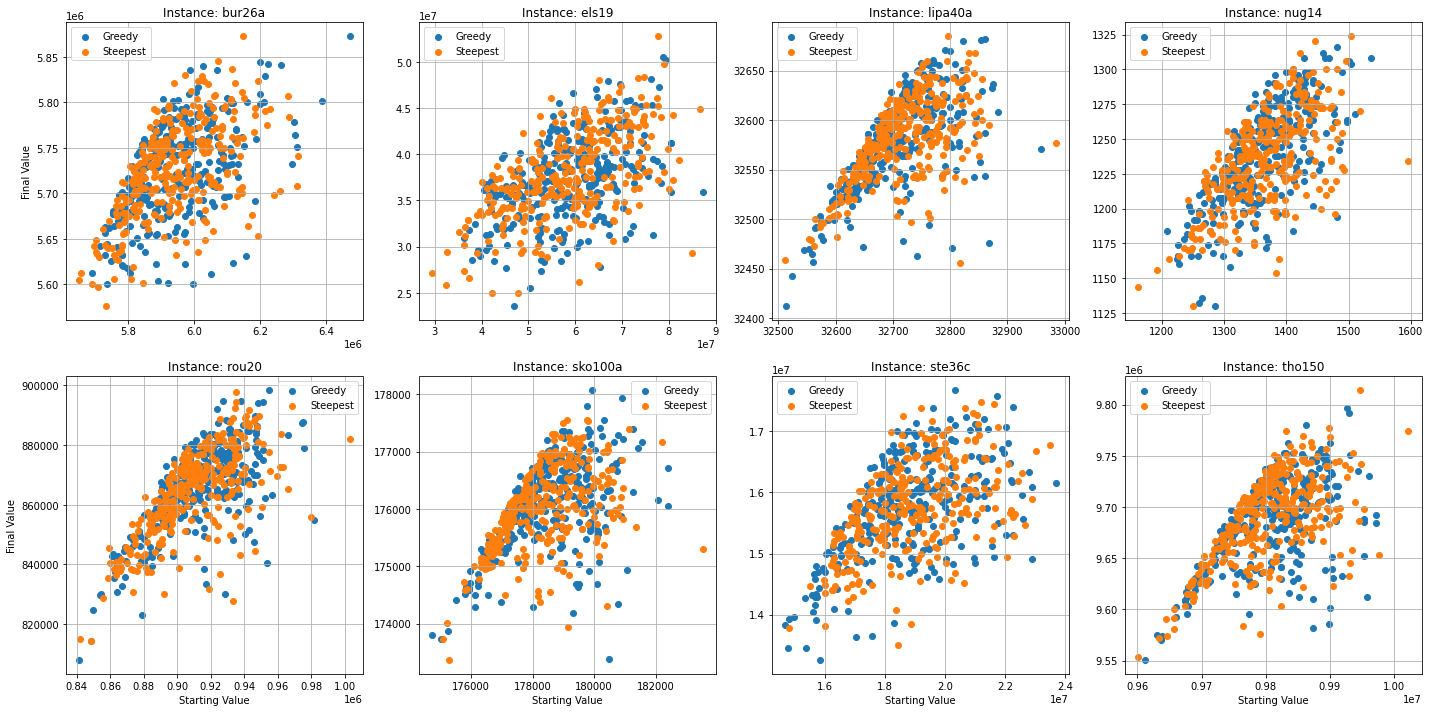

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data)
instances = df['instance'].unique()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, (ax, inst) in enumerate(zip(axes, instances)):
    subset = df[df['instance'] == inst]
    for meth in subset['method'].unique():
        group = subset[subset['method'] == meth]
        ax.scatter(group['start_val'], group['f_val'], label=meth)
    overall_min = min(subset['start_val'].min(), subset['f_val'].min())
    overall_max = max(subset['start_val'].max(), subset['f_val'].max())
    # ax.plot([overall_min, overall_max], [overall_min, overall_max], 'r--', label='x = y')
    ax.set_title(f'Instance: {inst}')
    ax.legend()
    ax.grid(True)
    
    row, col = divmod(i, 4)
    if row == 1:
        ax.set_xlabel('Starting Value')
    else:
        ax.set_xlabel('')
    if col == 0:
        ax.set_ylabel('Final Value')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

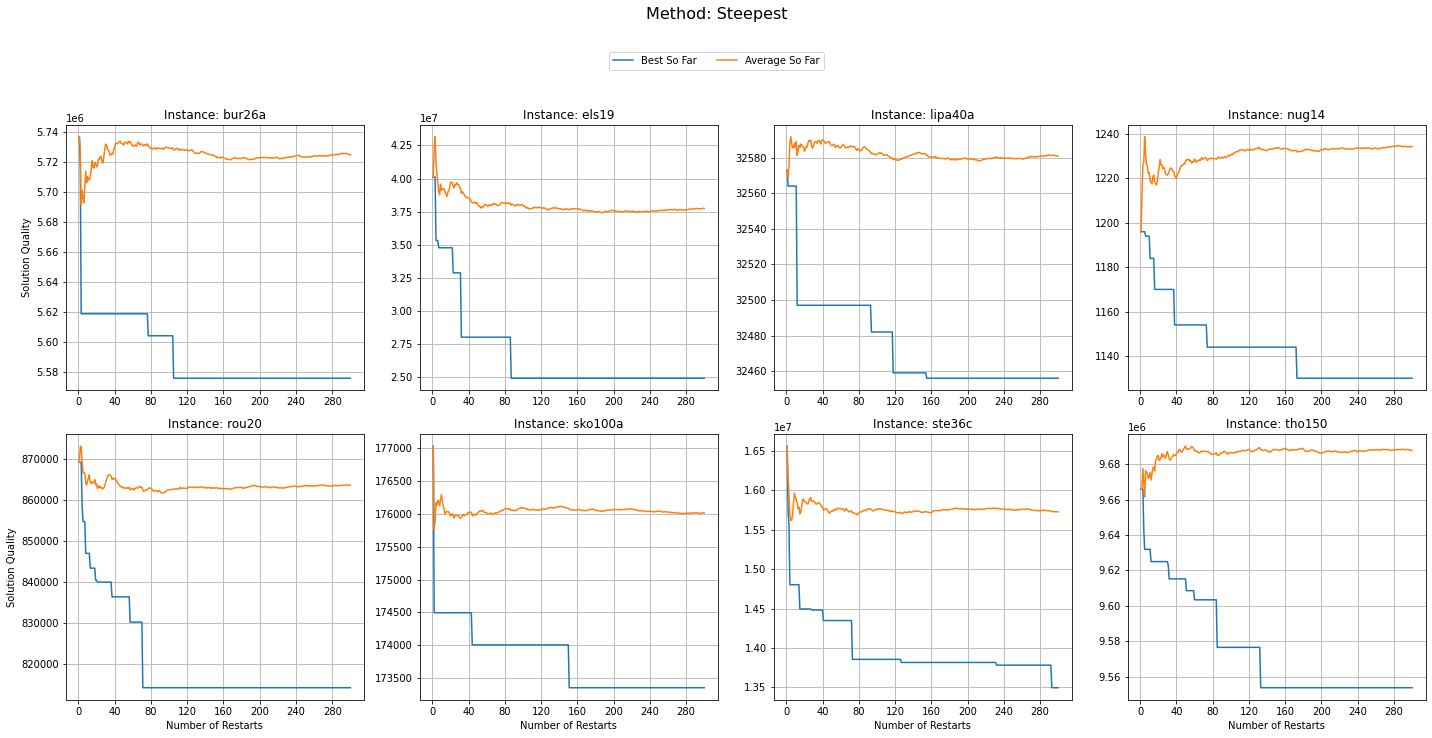

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd



greedy_df = pd.DataFrame(data)
greedy_df = greedy_df[greedy_df['method'] == 'Steepest']
instances = greedy_df['instance'].unique()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, inst in enumerate(instances):
    ax = axes[i]
    subset = greedy_df[greedy_df['instance'] == inst].sort_values('run').reset_index(drop=True)
    x = range(1, len(subset) + 1)
    subset['cumulative_best'] = subset['f_val'].cummin()
    subset['cumulative_avg'] = subset['f_val'].expanding().mean()

    ax.plot(x, subset['cumulative_best'], label='Best So Far')
    ax.plot(x, subset['cumulative_avg'], label='Average So Far')
    ax.set_title(f'Instance: {inst}')
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

    # Set x and y labels only on outer plots
    if i // 4 == 1:
        ax.set_xlabel('Number of Restarts')
    if i % 4 == 0:
        ax.set_ylabel('Solution Quality')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Method: Steepest', fontsize=16, y=1.02)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.965))

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

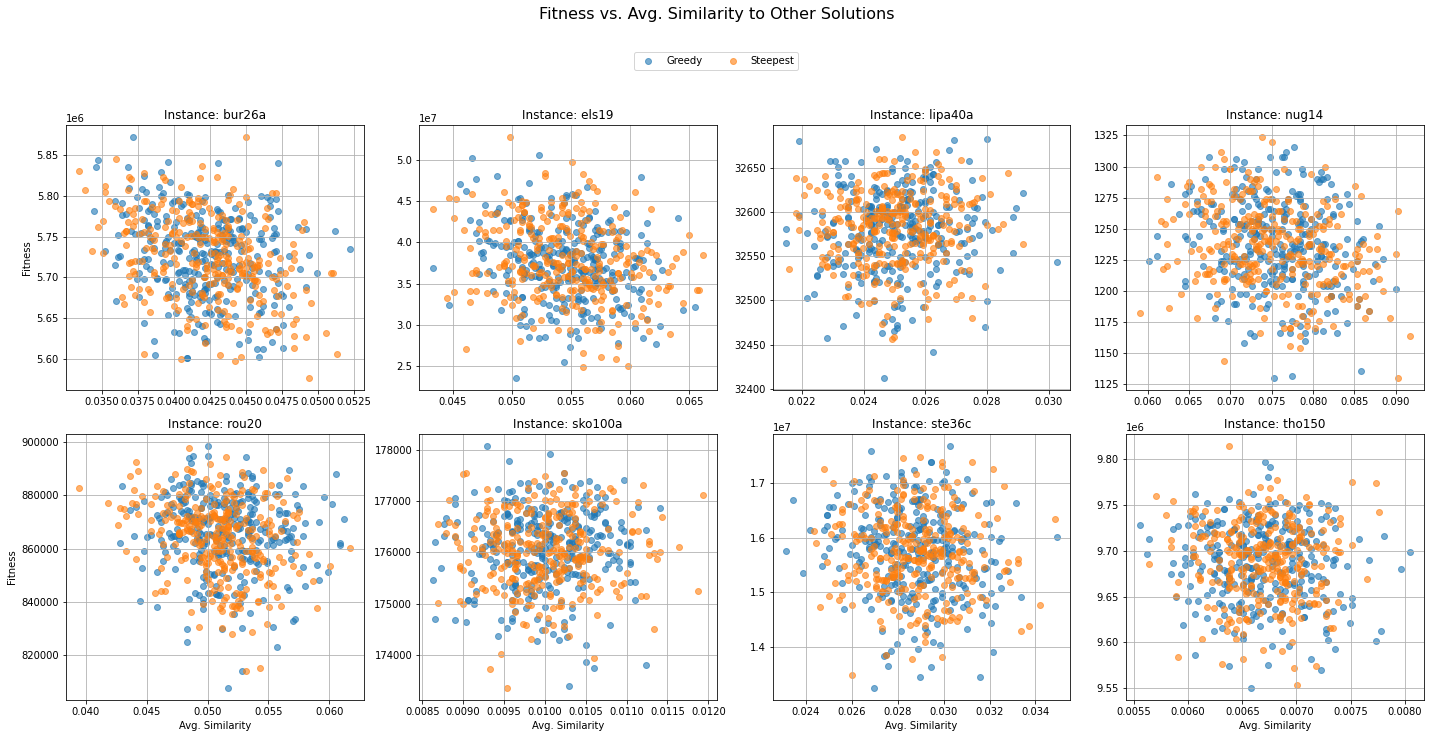

In [16]:
df = pd.DataFrame(data)
instances = df['instance'].unique()
methods = df['method'].unique()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

def similarity(sol1, sol2):
    return sum(a == b for a, b in zip(sol1, sol2)) / len(sol1)

for i, inst in enumerate(instances):
    ax = axes[i]
    for meth in methods:
        subset = df[(df['instance'] == inst) & (df['method'] == meth)].reset_index(drop=True)
        if len(subset) == 0:
            continue

        subset['avg_similarity'] = 0.0
        for j, row in subset.iterrows():
            others = subset.drop(index=j)['solution']
            similarities = [similarity(row['solution'], other) for other in others]
            subset.at[j, 'avg_similarity'] = np.mean(similarities)

        ax.scatter(subset['avg_similarity'], subset['f_val'], label=meth, alpha=0.6)

    ax.set_title(f'Instance: {inst}')
    ax.grid(True)

    if i % 4 == 0:
        ax.set_ylabel('Fitness')
    if i // 4 == 1:
        ax.set_xlabel('Avg. Similarity')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(methods), bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Fitness vs. Avg. Similarity to Other Solutions', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [ ]:
optimums = {
    "bur26a": (26, 15, 11, 7, 4, 12, 13, 2, 6, 18, 1, 5, 9, 21, 8, 14, 3, 20, 19, 25, 17, 10, 16, 24, 23, 22),
    "els19": (9, 10, 7, 18, 14, 19, 13, 17, 6, 11, 4, 5, 12, 8, 15, 16, 1, 2, 3),
    "lipa40a": (7, 6, 14, 27, 19, 37, 21, 2, 16, 1, 40, 24, 30, 23, 5, 28, 22, 8, 20, 35, 32, 26, 29, 3, 4, 11, 36, 10, 13, 38, 9, 17, 31, 18, 33, 15, 25, 34, 39, 12)
}

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (300,) and arg 1 with shape (5,).

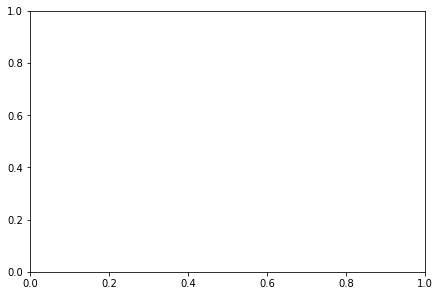

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_names = [data[n*10]["method"] for n in range(5)]
y = [y["f_val"] for y in data]
y_mean = [round(np.mean(y[i:i+10])) for i in range(5)]
y_max = [max(y[i:i+10]) for i in range(5)]
y_min =[min(y[i:i+10]) for i in range(5)]

fig, ax = plt.subplots(layout="constrained")
y_s = [y_min, y_mean, y_max]
x = np.arange(len(x))
rects = ax.bar(x, y_min, 0.25, label = "min")
#ax.bar_label(rects, padding=3)
rects2 = ax.bar(x+0.25,y_mean, 0.25, label = "mean")
#ax.bar_label(rects2, padding=3, )
rects3 = ax.bar(x+0.5, y_max, 0.25, label = "max")
#ax.bar_label(rects3, padding=3)
ax.set_xticks(x + 0.25, x_names)
ax.legend(loc='upper left', ncols=3)
plt.ylim([5500000, 6000000])
plt.show()

['Custom', 'Greedy', 'RandomSearch', 'RandomWalk', 'Steepest'] [np.float64(171.0), np.float64(159.1), np.float64(144.2), np.float64(132.2), np.float64(120.6)]


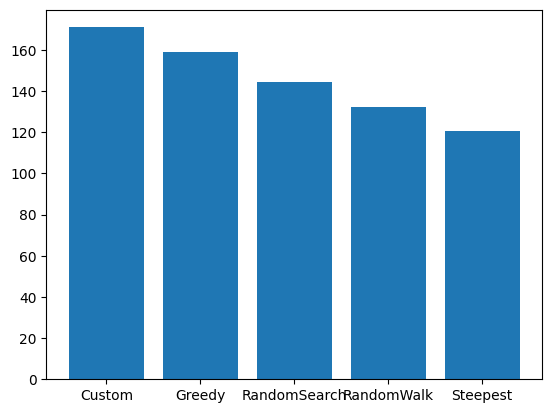

In [ ]:

y_step = [y["steps"] for y in data]
y_step = [np.mean(y_step[i:i+10]) for i in range(5)]
print(x, y_step)
plt.bar(x, y_step)
plt.show()

['Custom', 'Greedy', 'RandomSearch', 'RandomWalk', 'Steepest'] [np.float64(5940880.0), np.float64(5920455.7), np.float64(5902811.6), np.float64(5882904.4), np.float64(5861747.7)]


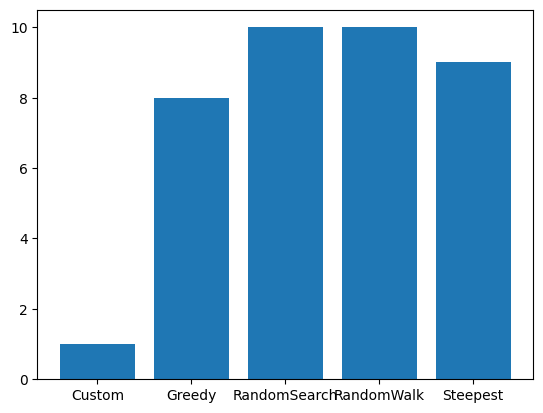

In [ ]:

y_once = [y["oneTime"] for y in times]
print(x, y)
plt.bar([i["method"] for i in times], y_once)
plt.show()